In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn missingno

In [1]:
# importing necessary Llibraries: 
import pandas as pd # importing the dataframe and it is used for data cleaning and analysis. 
import seaborn as sns # used for plotting statistical graphics
import matplotlib.pyplot as plt # used to create 2D graphs and plots 
import os
import pickle
import warnings # warnings module suppresses repeated warnings from the same source to cut down on the annoyance of seeing the same message over and over.
warnings.filterwarnings("ignore") # ignore warnings

Data cleaning and Preprocessing

In [2]:
# reading the dataset

df = pd.read_csv(r"D:\Guvi_Project\Swiggy’s Restaurant Recommendation System\Data\swiggy.csv")

In [3]:
# dataset overview
# univariate analysis

df.info() # gives the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [4]:
# gives the first 5 rows of the dataset
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [5]:
# changing the datatypes

df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce')

df['cost'] = df['cost'].str.split(" ").str[1]
df['cost'] = pd.to_numeric(df['cost'], errors = 'coerce')

df['rating_count'] = df['rating_count'].astype('category')

# name, city, cuisine
df['name'] = df['name'].astype('category')
df['city'] = df['city'].str.split(",").str[0]
df['city'] = df['city'].astype('category')
df['cuisine'] = df['cuisine'].astype('category')

df.drop(columns=['address', 'lic_no', 'link','id', 'menu'], inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   name          148455 non-null  category
 1   city          148541 non-null  category
 2   rating        61441 non-null   float64 
 3   rating_count  148455 non-null  category
 4   cost          148410 non-null  float64 
 5   cuisine       148442 non-null  category
dtypes: category(4), float64(2)
memory usage: 8.6 MB


In [7]:
# statistical information about the dataset

df.describe() 

,rating,cost
count,61441.000000,148410.000000
mean,3.894461,287.600714
std,0.460058,796.730688
min,1.000000,1.000000
25%,3.700000,200.000000
50%,4.000000,250.000000
75%,4.200000,300.000000
max,5.000000,300350.000000


In [8]:
df.shape # gives the shape of the dataset

(148541, 6)

In [9]:
df.columns # gives the columns of the dataset

Index(['name', 'city', 'rating', 'rating_count', 'cost', 'cuisine'], dtype='object')

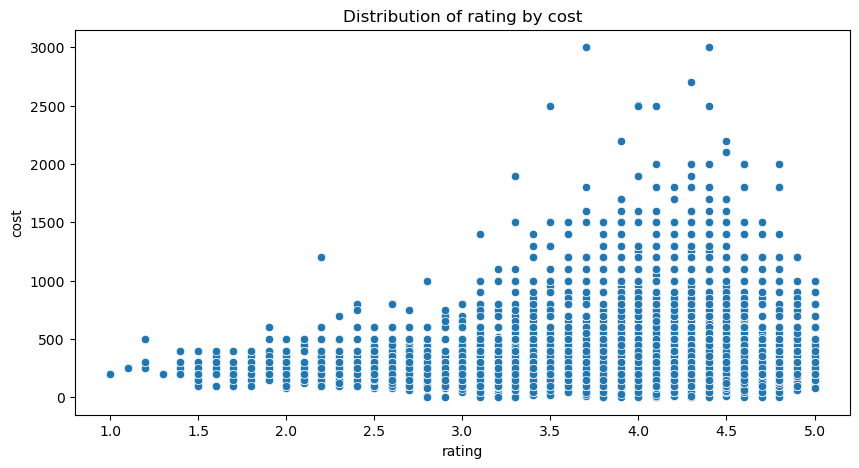

In [10]:
# Bi-variate analysis

plt.figure(figsize=(10, 5))
sns.scatterplot(data = df, x = "rating", y ='cost')
plt.title('Distribution of rating by cost')
plt.show()

In [11]:
df[df.duplicated()]

,name,city,rating,rating_count,cost,cuisine
14830,House Of Candy,Whitefield,NaN,Too Few Ratings,400.0,Sweets
26906,Top N Town Bakery,Bhopal,NaN,Too Few Ratings,100.0,"Ice Cream,Desserts"
33046,NaN,West Chd,NaN,NaN,NaN,NaN
36544,NaN,George Town,NaN,NaN,NaN,NaN
55759,Love At First Bite,Rohini,NaN,Too Few Ratings,200.0,Bakery
62296,Gold Star Biryani,Dindigul,4.0,100+ ratings,300.0,"North Indian,South Indian"
64908,Tea Post,Gondal,4.3,100+ ratings,200.0,"Snacks,Beverages"
66080,Love At First Bite,Greenfields_FBD,NaN,Too Few Ratings,200.0,"Bakery,Desserts"
66887,NaN,Sector 15_FBD,NaN,NaN,NaN,NaN
81422,NaN,Ichalkaranji,NaN,NaN,NaN,NaN


In [12]:
# droping the duplicates

df.drop_duplicates(inplace=True)

<Axes: >

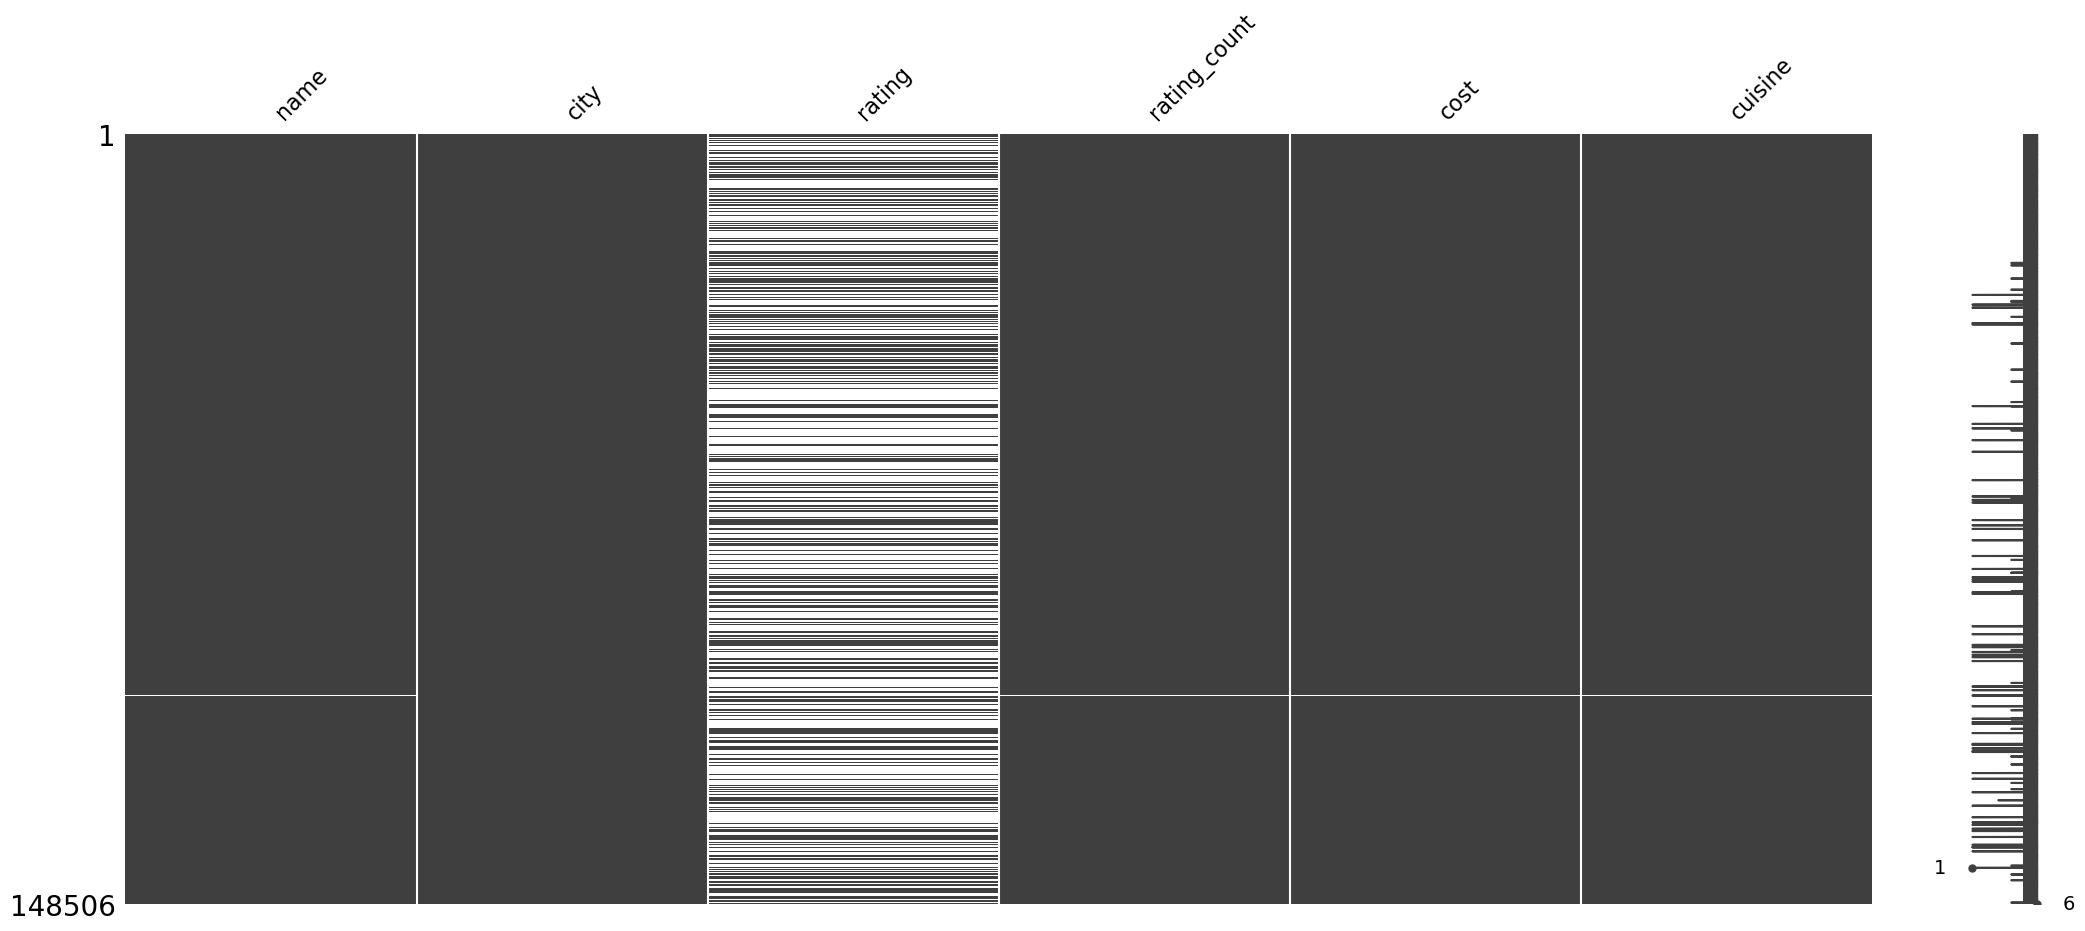

In [13]:
# checking for missing values in the dataset
import missingno as msno # used to visualize missing data in the dataset
msno.matrix(df) # gives the visualization of missing values in the dataset


In [14]:
df.isnull().sum()

name               61
city                0
rating          87068
rating_count       61
cost              106
cuisine            74
dtype: int64

In [15]:
df['rating'].fillna(df['rating'].mean(), inplace=True)

In [16]:
df.shape

(148506, 6)

In [17]:
df.dropna(inplace = True)

In [18]:
df.shape

(148388, 6)

In [19]:
df.isnull().sum()

name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
dtype: int64

In [20]:
output_dir = 'D:\Guvi_Project\Swiggy’s Restaurant Recommendation System\Data'
os.makedirs(output_dir, exist_ok=True)
cleaned_filepath = os.path.join(output_dir, "Cleaned_data.csv")
df.to_csv(cleaned_filepath, index=False)

In [21]:
cleaned_df = pd.read_csv(r"D:\Guvi_Project\Swiggy’s Restaurant Recommendation System\Data\Cleaned_data.csv")

In [22]:

# label encoding for rating count column
cleaned_df['rating_count'].unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings'],
      dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_encoder = le.fit_transform(cleaned_df[['rating_count']])

label_rating_count = pd.DataFrame(label_encoder, columns=['rating count'])
df_label_encoded = pd.concat([cleaned_df, label_rating_count], axis=1)

In [24]:
df_label_encoded.drop(columns=['rating_count'], inplace= True)
df_label_encoded

,name,city,rating,cost,cuisine,rating count
0,AB FOODS POINT,Abohar,3.894446,200.0,"Beverages,Pizzas",7
1,Janta Sweet House,Abohar,4.400000,200.0,"Sweets,Bakery",4
2,theka coffee desi,Abohar,3.800000,100.0,Beverages,0
3,Singh Hut,Abohar,3.700000,250.0,"Fast Food,Indian",3
4,GRILL MASTERS,Abohar,3.894446,250.0,"Italian-American,Fast Food",7
...,...,...,...,...,...,...
148383,The Food Delight,Yavatmal,3.894446,200.0,"Fast Food,Snacks",7
148384,MAITRI FOODS & BEVERAGES,Yavatmal,3.894446,300.0,Pizzas,7
148385,Cafe Bella Ciao,Yavatmal,3.894446,300.0,"Fast Food,Snacks",7
148386,GRILL ZILLA,Yavatmal,3.894446,250.0,Continental,7


In [25]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder with sparse=False
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use sparse_output=False to get a dense array

# Fit and transform the categorical columns
one_hot_encoded = encoder.fit_transform(cleaned_df[['city','cuisine']])

# Convert the array into a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['city','cuisine']))

# Concatenate with the original DataFrame
df_encoded = pd.concat([cleaned_df, one_hot_df], axis=1)

# Drop original categorical columns
df_encoded = df_encoded.drop(['city','cuisine'], axis=1)

# Display the first few rows
df_encoded.head()


,name,rating,rating_count,cost,city_Abids & Koti,city_Abohar,city_Adajan,city_Adilabad,city_Adityapur,city_Adoni,...,"cuisine_Vietnamese,Snacks",cuisine_Waffle,"cuisine_Waffle,Bakery","cuisine_Waffle,Beverages","cuisine_Waffle,Burgers","cuisine_Waffle,Chinese","cuisine_Waffle,Desserts","cuisine_Waffle,Fast Food","cuisine_Waffle,Ice Cream","cuisine_Waffle,Snacks"
0,AB FOODS POINT,3.894446,Too Few Ratings,200.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Janta Sweet House,4.400000,50+ ratings,200.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,theka coffee desi,3.800000,100+ ratings,100.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Singh Hut,3.700000,20+ ratings,250.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GRILL MASTERS,3.894446,Too Few Ratings,250.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_encoded.shape

(148388, 2956)

In [33]:
name_encoded = le.fit_transform(df_encoded[['name']])
df_name_encoded = pd.DataFrame(name_encoded, columns = ['Name'])
df_all_encoded = pd.concat([df_encoded,df_name_encoded], axis=1)
df_all_encoded.drop(columns=['name'], inplace= True)
df_all_encoded

,rating,rating_count,cost,city_Abids & Koti,city_Abohar,city_Adajan,city_Adilabad,city_Adityapur,city_Adoni,city_Adyar,...,cuisine_Waffle,"cuisine_Waffle,Bakery","cuisine_Waffle,Beverages","cuisine_Waffle,Burgers","cuisine_Waffle,Chinese","cuisine_Waffle,Desserts","cuisine_Waffle,Fast Food","cuisine_Waffle,Ice Cream","cuisine_Waffle,Snacks",Name
0,3.894446,Too Few Ratings,200.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1581
1,4.400000,50+ ratings,200.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47399
2,3.800000,100+ ratings,100.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112598
3,3.700000,20+ ratings,250.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90268
4,3.894446,Too Few Ratings,250.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148383,3.894446,Too Few Ratings,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100625
148384,3.894446,Too Few Ratings,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56559
148385,3.894446,Too Few Ratings,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18406
148386,3.894446,Too Few Ratings,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34943


In [34]:
filename = os.path.join(output_dir, 'encoder.pkl')
pickle.dump(df_encoded, open(filename,'wb'))

In [35]:
encoded_filepath = os.path.join(output_dir, "Encoded_data.csv")
df_encoded.to_csv(encoded_filepath, index=False)

In [ ]:
# Load the datasets
cleaned_data = pd.read_csv(r"D:\Guvi_Project\Swiggy’s Restaurant Recommendation System\Data\Cleaned_data.csv", index_col=0)  # Ensure index is loaded
encoded_data = pd.read_csv(r"D:\Guvi_Project\Swiggy’s Restaurant Recommendation System\Data\Encoded_data.csv", index_col=0)  # Ensure index is loaded


# Compare indices
if not cleaned_data.index.equals(encoded_data.index):
    print("Warning: Indices do not match!")
else:
    print("Indices match successfully.")